# Set working directory and import modules

In [1]:
import os
# Change working directory to the root of the repository (assumes notebook working directory is `tutorials`)
os.chdir('/Users/breinsta/Desktop/alfa_research/donkey_ge/')
import main
from util.plot_ipd import plot_iterated_prisoners_dilemma, plot_ipd_from_file
from fitness.game_theory_game import PrisonersDilemma
from typing import List, Tuple

# Run Iterated Prisoners Dilemma with two different player strategies

In [2]:
# Strategy for always cooperate
player_1 = lambda h, i: ["D","D","D","C"][i % 4]
# Strategy for cooperate if opponent cooperated previous turn
player_2 = lambda h, i: "C"
n_iterations = 5
memory_size = 1
# Setup a prisoners dilemma engagment
pd = PrisonersDilemma(n_iterations=n_iterations, memory_size=memory_size, store_stats=True, out_file_name=PrisonersDilemma.DEFAULT_OUT_FILE)
# Run the strategies against each other
sentences, histories = pd.run(player_1=player_1, player_2=player_2)
# Plot the choices and the payoffs from the engagement
print(sentences) 
print(histories)

[(0.0, -3.0), (0.0, -3.0), (0.0, -3.0), (-1.0, -1.0), (0.0, -3.0)]
{'player_1': {'strategy_history': ['D', 'D', 'D', 'C', 'D']}, 'player_2': {'strategy_history': ['C', 'C', 'C', 'C', 'C']}}


/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


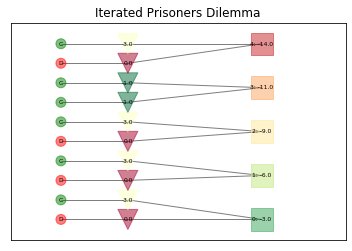

In [3]:
def reformat_history(histories): 
    return list(map(lambda x, y: (x,y), 
                    histories["player_1"]["strategy_history"], 
                    histories["player_2"]["strategy_history"]))

plot_iterated_prisoners_dilemma(sentences, reformat_history(histories), out_path='.')

# Run the heuristic search

In [4]:
# Set to use the configuration file and output directory
args = ["-o", "results", "-f", "tests/configurations/iterated_prisoners_dilemma.yml"]
_ = main.main(args)

Namespace(coev=False, configuration_file='tests/configurations/iterated_prisoners_dilemma.yml', output_dir='results')
Setting random seed: 1579877793 0.20160
donkey_ge settings: {'population_size': 500, 'max_length': 10, 'elite_size': 25, 'generations': 25, 'tournament_size': 2, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'bnf_grammar': 'tests/grammars/simple_iterated_prisoners_dilemma.bnf', 'fitness_function': {'name': 'IteratedPrisonersDilemma', 'opponent': "lambda h, i: 'C'", 'n_iterations': 4}, 'output_dir': 'results', 'coev': False, 'seed': 1579877793}
Gen:0 t:0.005 fit_ave:-0.50+-0.500 size_ave:1.00+-0.000 length_ave:10.00+-0.000 Ind: lambda h, i: "D"; 0.0
Gen:1 t:0.018 fit_ave:-0.23+-0.421 size_ave:1.00+-0.000 length_ave:10.00+-0.000 Ind: lambda h, i: "D"; 0.0
Gen:2 t:0.015 fit_ave:-0.02+-0.125 size_ave:1.00+-0.000 length_ave:10.00+-0.000 Ind: lambda h, i: "D"; 0.0
Gen:3 t:0.015 fit_ave:0.00+-0.000 size_ave:1.0

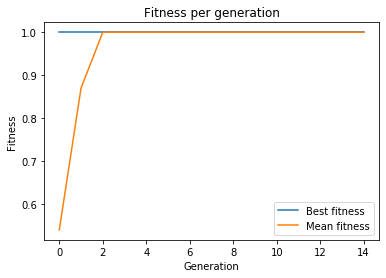

In [5]:
from util.plot_donkey_ge import plot_fitness
# Plot fitness from a search
plot_fitness(in_path="tmp")

# Run the coevolutionary search

In [6]:
args = ["-o", "tmpcoev", "-f", "tests/configurations/coevolution_iterated_prisoners_dilemma.yml", "--coev"]
_ = main.main(args)

Namespace(coev=True, configuration_file='tests/configurations/coevolution_iterated_prisoners_dilemma.yml', output_dir='tmpcoev')
Setting random seed: 1 0.13436
donkey_ge settings: {'population_size': 4, 'max_length': 100, 'generations': 2, 'tournament_size': 2, 'seed': 1, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'elite_size': 1, 'populations': {'attacker': {'adversary': 'defender', 'bnf_grammar': 'tests/grammars/iterated_prisoners_dilemma.bnf', 'fitness_function': {'name': 'IteratedPrisonersDilemma', 'opponent': 'None', 'n_iterations': 4}}, 'defender': {'adversary': 'attacker', 'bnf_grammar': 'tests/grammars/iterated_prisoners_dilemma.bnf', 'fitness_function': {'name': 'IteratedPrisonersDilemma', 'opponent': 'None', 'n_iterations': 4}}}, 'output_dir': 'tmpcoev', 'coev': True}
attacker 14
Gen:0 t:0.002 fit_ave:-1.00+-0.293 size_ave:5.00+-0.000 length_ave:100.00+-0.000 Ind: lambda h, i: ["D", "D", "C", "D"][i % 4]; -

In [7]:
import util.plot_donkey_ge as pdg
pdg.plot_population_freqs(out_path="tmpcoev", in_path="tmpcoev",title="pd coev")

<Figure size 432x288 with 0 Axes>